# ***TP2 - MLVOT***

In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linear_sum_assignment
import time
%matplotlib inline

## **1. Loading and checking the best data**

In [3]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [4]:
def load_data(path, sep=","):
    return pd.read_csv(path, sep=sep, names= ['frame', 'id', 'bb_left', 'bb_top', 'bb_width',
'bb_height', 'conf', 'x', 'y', 'z'])

In [5]:
def check_data(df):
    print(bcolors.HEADER + "General info :" + bcolors.ENDC)
    print(df.info())

    print(bcolors.HEADER + "\n\nStats :" + bcolors.ENDC)
    print(df.describe())

    print(bcolors.HEADER + "\n\nNull entries :" + bcolors.ENDC)
    print(df.isnull().sum())

    print(bcolors.HEADER + "\n\nTypes :" + bcolors.ENDC)
    print(df.dtypes)

### *Public dataset*

In [6]:
path_det = "files/det/public-dataset/det.txt"
df_det_public = load_data(path_det)
df_det_public['conf'] /= 100
df_det_public

frame  id  bb_left  bb_top  bb_width  bb_height     conf  x  y  z
0         1  -1     1689     385   146.620    332.710  0.67567 -1 -1 -1
1         1  -1     1303     503    61.514    139.590  0.29439 -1 -1 -1
2         1  -1     1258     569    40.123     91.049  0.19601 -1 -1 -1
3         1  -1       31     525   113.370    257.270  0.17013 -1 -1 -1
4         1  -1     1800     483    94.660    214.810  0.11949 -1 -1 -1
...     ...  ..      ...     ...       ...        ...      ... .. .. ..
4897    525  -1     1479     580    28.302     64.224  0.36629 -1 -1 -1
4898    525  -1     1806     521    36.723     83.333  0.23327 -1 -1 -1
4899    525  -1     1820     381   123.420    280.060  0.14567 -1 -1 -1
4900    525  -1     1655     425    94.660    214.810  0.12803 -1 -1 -1
4901    525  -1     1438     463    56.686    128.630  0.12529 -1 -1 -1

[4902 rows x 10 columns]

In [7]:
check_data(df_det_public)

General info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   frame      4902 non-null   int64  
 1   id         4902 non-null   int64  
 2   bb_left    4902 non-null   int64  
 3   bb_top     4902 non-null   int64  
 4   bb_width   4902 non-null   float64
 5   bb_height  4902 non-null   float64
 6   conf       4902 non-null   float64
 7   x          4902 non-null   int64  
 8   y          4902 non-null   int64  
 9   z          4902 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 383.1 KB
None


Stats :
             frame      id      bb_left       bb_top     bb_width  \
count  4902.000000  4902.0  4902.000000  4902.000000  4902.000000   
mean    273.949612    -1.0  1266.308650   432.289678   120.214085   
std     144.119813     0.0   522.326834    94.557726    64.348312   
min       1.000000    -1.0   -52.000000     1.000000   

### *YOLOv5s*

In [8]:
path_det = "files/det/Yolov5l/det.txt"
df_det_s = load_data(path_det, sep=" ")
df_det_s

frame  id  bb_left  bb_top  bb_width  bb_height      conf  x  y  z
0         1  -1     1700     391       156        337  0.914550 -1 -1 -1
1         1  -1      250     456       107        248  0.883148 -1 -1 -1
2         1  -1     1255     539        60        118  0.826354 -1 -1 -1
3         1  -1     1288     459        73        199  0.745969 -1 -1 -1
4         1  -1      120     504        93        239  0.740778 -1 -1 -1
...     ...  ..      ...     ...       ...        ...       ... .. .. ..
4557    525  -1     1432     457        96        193  0.841939 -1 -1 -1
4558    525  -1     1340     439        95        218  0.815440 -1 -1 -1
4559    525  -1      119     503        87        244  0.639956 -1 -1 -1
4560    525  -1     1676     440        58        201  0.568499 -1 -1 -1
4561    525  -1     1288     442        61        213  0.510557 -1 -1 -1

[4562 rows x 10 columns]

In [9]:
check_data(df_det_s)

General info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   frame      4562 non-null   int64  
 1   id         4562 non-null   int64  
 2   bb_left    4562 non-null   int64  
 3   bb_top     4562 non-null   int64  
 4   bb_width   4562 non-null   int64  
 5   bb_height  4562 non-null   int64  
 6   conf       4562 non-null   float64
 7   x          4562 non-null   int64  
 8   y          4562 non-null   int64  
 9   z          4562 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 356.5 KB
None


Stats :
             frame      id      bb_left       bb_top     bb_width  \
count  4562.000000  4562.0  4562.000000  4562.000000  4562.000000   
mean    275.546909    -1.0  1125.018413   398.295923   124.803376   
std     147.465487     0.0   590.615114    98.967614    83.902927   
min       1.000000    -1.0     0.000000     0.000000   

### *YOLOv5l*

In [10]:
path_det = "files/det/Yolov5l/det.txt"
df_det_l = load_data(path_det, sep=" ")
df_det_l

frame  id  bb_left  bb_top  bb_width  bb_height      conf  x  y  z
0         1  -1     1700     391       156        337  0.914550 -1 -1 -1
1         1  -1      250     456       107        248  0.883148 -1 -1 -1
2         1  -1     1255     539        60        118  0.826354 -1 -1 -1
3         1  -1     1288     459        73        199  0.745969 -1 -1 -1
4         1  -1      120     504        93        239  0.740778 -1 -1 -1
...     ...  ..      ...     ...       ...        ...       ... .. .. ..
4557    525  -1     1432     457        96        193  0.841939 -1 -1 -1
4558    525  -1     1340     439        95        218  0.815440 -1 -1 -1
4559    525  -1      119     503        87        244  0.639956 -1 -1 -1
4560    525  -1     1676     440        58        201  0.568499 -1 -1 -1
4561    525  -1     1288     442        61        213  0.510557 -1 -1 -1

[4562 rows x 10 columns]

In [11]:
check_data(df_det_l)

General info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   frame      4562 non-null   int64  
 1   id         4562 non-null   int64  
 2   bb_left    4562 non-null   int64  
 3   bb_top     4562 non-null   int64  
 4   bb_width   4562 non-null   int64  
 5   bb_height  4562 non-null   int64  
 6   conf       4562 non-null   float64
 7   x          4562 non-null   int64  
 8   y          4562 non-null   int64  
 9   z          4562 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 356.5 KB
None


Stats :
             frame      id      bb_left       bb_top     bb_width  \
count  4562.000000  4562.0  4562.000000  4562.000000  4562.000000   
mean    275.546909    -1.0  1125.018413   398.295923   124.803376   
std     147.465487     0.0   590.615114    98.967614    83.902927   
min       1.000000    -1.0     0.000000     0.000000   

### *Best choice overall*

I will be keeping YOLOv5s as the best choice for the detection data, as it has the best overall performance, similar to YOLOv5l but with a smaller model size.

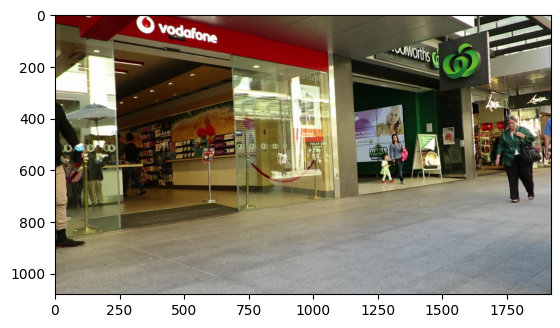

In [12]:
# Lets print the bounding box on the first image :

img = cv2.imread("files/img1/000001.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [13]:
temp_df = df_det_s[df_det_s['frame'] == 1]
temp_df

frame  id  bb_left  bb_top  bb_width  bb_height      conf  x  y  z
0      1  -1     1700     391       156        337  0.914550 -1 -1 -1
1      1  -1      250     456       107        248  0.883148 -1 -1 -1
2      1  -1     1255     539        60        118  0.826354 -1 -1 -1
3      1  -1     1288     459        73        199  0.745969 -1 -1 -1
4      1  -1      120     504        93        239  0.740778 -1 -1 -1
5      1  -1        0     243       110        666  0.655897 -1 -1 -1
6      1  -1     1885     369        35        213  0.489681 -1 -1 -1

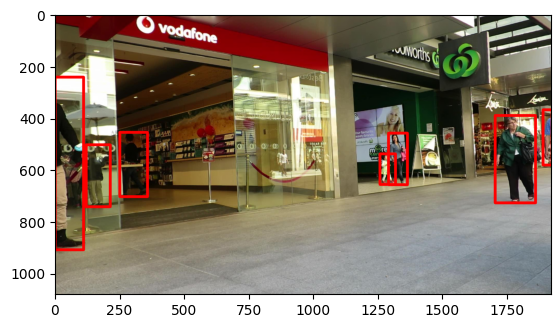

In [14]:
for _, row in temp_df.iterrows():
    x, y, w, h = int(row['bb_left']), int(row['bb_top']), int(row['bb_width']), int(row['bb_height'])
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 10)

plt.imshow(img)

## ***2. Create similarity matrix***

### *2.1 Initialization*
* Define the lists or arrays to store the current tracked bounding boxes and the new detections for the current frame.

In [15]:
def get_current_list_bbox(df, frame):
    res = []

    temp_df = df[df['frame'] == frame]
    for _, row in temp_df.iterrows():
        x, y, w, h = row['bb_left'], row['bb_top'], row['bb_width'], row['bb_height']
        res.append([x, y, w, h])

    return res

In [16]:
current_frame = 1
tracked_bboxs = get_current_list_bbox(df_det_s, current_frame)
new_detections = get_current_list_bbox(df_det_s, current_frame+1)

In [17]:
tracked_bboxs

[[1700.0, 391.0, 156.0, 337.0],
 [250.0, 456.0, 107.0, 248.0],
 [1255.0, 539.0, 60.0, 118.0],
 [1288.0, 459.0, 73.0, 199.0],
 [120.0, 504.0, 93.0, 239.0],
 [0.0, 243.0, 110.0, 666.0],
 [1885.0, 369.0, 35.0, 213.0]]

In [18]:
new_detections

[[1689.0, 390.0, 163.0, 338.0],
 [262.0, 456.0, 96.0, 250.0],
 [1257.0, 538.0, 59.0, 120.0],
 [0.0, 247.0, 114.0, 662.0],
 [1291.0, 461.0, 71.0, 197.0],
 [119.0, 503.0, 83.0, 240.0],
 [1884.0, 370.0, 35.0, 208.0]]

### *2.2 Calculate IoU for all pairs*
* Create a similarity matrix (a 2D array) where each entry (i,j) corresponds to the IoU value between the ith tracked object and the jth new detection

* The dimensions of this matrix will be (N×M), where N is the number of tracked objects and M is the number of new detections. Compute similarity score using the Jaccard index (intersection-over-union) for each pair of bounding boxes

In [19]:
def get_IoU(bbox1, bbox2):
    x, y, w, h = bbox1
    _x, _y, _w, _h = bbox2

    xA = max(x, _x)
    yA = max(y, _y)
    xB = min(x+w, _x+_w)
    yB = min(y+h, _y+_h)

    interArea = max(0, xB - xA) * max(0, yB - yA)
    trackedArea = bbox1[2] * bbox1[3]
    newArea = bbox2[2] * bbox2[3]
    IoU = interArea / float(trackedArea + newArea - interArea)

    return IoU

In [20]:
def get_sim_matrix(bbox1, bbox2):
    matrix = np.zeros((len(bbox1), len(bbox2)))

    for i, tracked_bbox in enumerate(bbox1):
        for j, new_detection in enumerate(bbox2):
            matrix[i][j] = get_IoU(tracked_bbox, new_detection)

    return matrix

In [21]:
sim_matrix = get_sim_matrix(tracked_bboxs, new_detections)
sim_matrix

array([[0.90755111, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.87336892, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.93548387, 0.        , 0.15530573,
        0.        , 0.        ],
       [0.        , 0.        , 0.18413986, 0.        , 0.93656615,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.86912945, 0.        ],
       [0.        , 0.        , 0.        , 0.95931918, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.92287616]])

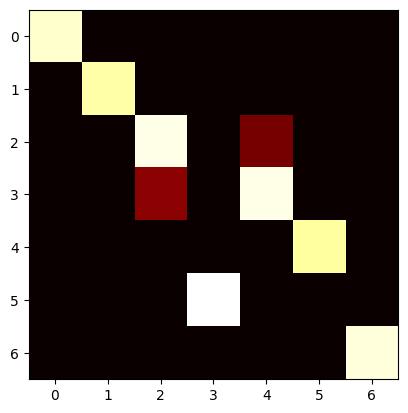

In [22]:
plt.imshow(sim_matrix, cmap='hot', interpolation='nearest')
plt.show()

## ***3. Associate the detections to tracks***
* Apply the Hungarian algorithm using existing libraries (e.g. function linear_sum_assignement from scipy library for Python) to find the optimal assignment of detections to tracked objects

In [23]:
def get_assignments(sim_matrix):
    row_ind, col_ind = linear_sum_assignment(-sim_matrix)

    return row_ind, col_ind

In [24]:
assignments = get_assignments(sim_matrix)
assignments

(array([0, 1, 2, 3, 4, 5, 6]), array([0, 1, 2, 4, 5, 3, 6]))

## ***4. Implement track management***
* Each object can be assigned to only one trajectory (ID)
* Create and update lists for matches, unmatched detections and unmatched tracks
    - Matched -> update existing tracks based on associations
    - Unmatched tracks -> remove tracks that exceed the maximum missed frames
    - Unmatched detections -> create new tracks

In [25]:
track_id_dict = {}
next_track_id = 1

def update_tracks_with_ids(tracked_bboxs, new_detections, assignments):
    global next_track_id
    matches = []
    unmatched_tracks = []
    unmatched_detections = []

    # Update matches and unmatched tracks
    for i, tracked_bbox in enumerate(tracked_bboxs):
        if i not in assignments[0]:
            unmatched_tracks.append(i)
        else:
            match_index = assignments[0].tolist().index(i)
            if assignments[1][match_index] < len(new_detections):
                matches.append([i, assignments[1][match_index]])
            else:
                unmatched_tracks.append(i)

    # Unmatched detections
    for j, new_detection in enumerate(new_detections):
        if j not in assignments[1]:
            unmatched_detections.append(j)

    # Update track IDs
    updated_tracks = {}
    for match in matches:
        track_idx, detection_idx = match
        # Retain the ID of the matched track
        for track_id, bbox in track_id_dict.items():
            if list(bbox) == list(tracked_bboxs[track_idx]):
                updated_tracks[track_id] = new_detections[detection_idx]

    # Add new IDs for unmatched detections
    for detection_idx in unmatched_detections:
        updated_tracks[next_track_id] = new_detections[detection_idx]
        next_track_id += 1

    # Update global track ID dictionary
    track_id_dict.clear()
    track_id_dict.update(updated_tracks)

    return matches, unmatched_tracks, unmatched_detections

## ***5. Develop an interface for tracking results check to see if the tracker properly keeps track of objects***
* Display Video Frames
* Draw Bounding Boxes: Overlay bounding boxes for each tracked object on the frames
* Show Track IDs: Label the bounding boxes with track IDs for identification
* Save tracking video

In [26]:
def get_all_tracked_bboxs(df):
    frames = df['frame'].unique()
    all_tracked_bboxs = []
    all_new_detections = []
    all_sim_matrices = []
    all_assignments = []
    all_matches = []
    all_unmatched_tracks = []
    all_unmatched_detections = []

    for current_frame in frames:
        tracked_bboxs = get_current_list_bbox(df, current_frame)
        new_detections = get_current_list_bbox(df, current_frame + 1)

        sim_matrix = get_sim_matrix(tracked_bboxs, new_detections)
        assignments = get_assignments(sim_matrix)

        matches, unmatched_tracks, unmatched_detections = update_tracks_with_ids(tracked_bboxs, new_detections, assignments)

        all_tracked_bboxs.append(tracked_bboxs)
        all_new_detections.append(new_detections)
        all_sim_matrices.append(sim_matrix)
        all_assignments.append(assignments)
        all_matches.append(matches)
        all_unmatched_tracks.append(unmatched_tracks)
        all_unmatched_detections.append(unmatched_detections)

    return all_tracked_bboxs

In [27]:
all_tracked_bboxs = get_all_tracked_bboxs(df_det_s)

In [28]:
def save_video(frames, output_path, fps=10, frame_size=(1920, 1080)):
    result = cv2.VideoWriter(output_path,
                             cv2.VideoWriter_fourcc(*'MJPG'),
                             fps, frame_size)

    for frame in frames:
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        result.write(frame_bgr)

    result.release()
    print("The video was successfully saved")

In [29]:
def generate_frames(tracked_bboxs):
    frames = []

    for i in range(len(tracked_bboxs)):
        img = cv2.imread(f"files/img1/{str(i+1).zfill(6)}.jpg")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for j, bbox in enumerate(tracked_bboxs[i]):
            x, y, w, h = bbox
            x, y, w, h = int(x), int(y), int(w), int(h)
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)
            cv2.putText(img, str(j), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        frames.append(img)

    return frames

In [30]:
frames = generate_frames(all_tracked_bboxs)
save_video(frames, 'output.avi', fps=30, frame_size=(1920, 1080))

The video was successfully saved


## ***6. Save tracking results in a txt file***
The file name must be exactly like the sequence name. The file format should be the same as the ground truth file (gt.txt), which is a CSV text-file containing one-object instance per line. Each line must contain 10 values. Update the id column (2th value) with the unique ID assigned to the track. The 7th value (conf) act
as a flag 1.

In [31]:
def save_tracking_results(tracked_bboxs, output_file="ADL-Rundle-6.txt"):
    results = []

    for frame, content in enumerate(tracked_bboxs):
        for id, bbox in enumerate(content):
            x, y, w, h = bbox
            results.append(f"{frame+1},{id+1},{x},{y},{w},{h},1,1,1,1")

    with open(output_file, "w") as f:
        f.write("\n".join(results))

    print(f"Tracking results saved to {output_file}")

In [32]:
save_tracking_results(all_tracked_bboxs)

Tracking results saved to ADL-Rundle-6.txt


In [33]:
df = load_data("ADL-Rundle-6.txt", sep=",")
df

frame  id  bb_left  bb_top  bb_width  bb_height  conf  x  y  z
0         1   1   1700.0   391.0     156.0      337.0     1  1  1  1
1         1   2    250.0   456.0     107.0      248.0     1  1  1  1
2         1   3   1255.0   539.0      60.0      118.0     1  1  1  1
3         1   4   1288.0   459.0      73.0      199.0     1  1  1  1
4         1   5    120.0   504.0      93.0      239.0     1  1  1  1
...     ...  ..      ...     ...       ...        ...   ... .. .. ..
4557    522   4   1432.0   457.0      96.0      193.0     1  1  1  1
4558    522   5   1340.0   439.0      95.0      218.0     1  1  1  1
4559    522   6    119.0   503.0      87.0      244.0     1  1  1  1
4560    522   7   1676.0   440.0      58.0      201.0     1  1  1  1
4561    522   8   1288.0   442.0      61.0      213.0     1  1  1  1

[4562 rows x 10 columns]

# ***TP3 - MLVOT***

In [40]:
from mlvot.tp1.KalmanFilter import KalmanFilter

In [41]:
# Dictionary to store Kalman filters for each track
kalman_filters = {}

# Kalman Filter parameters
dt = 1.0  # Time interval
std_acc = 1.0
x_std_meas = 0.5
y_std_meas = 0.5

In [42]:
def initialize_kalman_filter(bbox):
    """Initialize a Kalman filter for a given bounding box."""
    x, y, w, h = bbox
    x_c = x + w / 2  # Centroid x
    y_c = y + h / 2  # Centroid y
    kf = KalmanFilter(dt, 0, 0, std_acc, x_std_meas, y_std_meas)
    kf.x_k = np.array([[x_c], [y_c], [0], [0]])  # Initial state
    return kf

In [43]:
def get_predicted_positions():
    """Use Kalman filters to predict the next positions of all tracks."""
    predicted_positions = {}
    for track_id, kf in kalman_filters.items():
        kf.predict()
        x_c, y_c = kf.x_k[0, 0], kf.x_k[1, 0]
        predicted_positions[track_id] = (x_c, y_c)
    return predicted_positions

In [55]:
def update_tracks_with_kalman(tracked_bboxs, new_detections, assignments):
    global next_track_id
    matches = []
    unmatched_tracks = []
    unmatched_detections = []

    # Predict positions of existing tracks
    predicted_positions = get_predicted_positions()  # {track_id: (x_c, y_c)}

    # Replace tracked_bboxs with predictions for IoU calculation
    predicted_bboxs = []
    track_id_to_index = {}  # Map track IDs to index in predicted_bboxs
    for idx, (track_id, (x_c, y_c)) in enumerate(predicted_positions.items()):
        # Check if track_id exists in track_id_dict
        if track_id not in track_id_dict:
            print(f"Warning: track_id {track_id} not found in track_id_dict. Skipping.")
            continue  # Skip this track if no corresponding bounding box

        track_id_to_index[track_id] = idx
        # Convert centroid predictions back to bounding box format using current bbox sizes
        x, y, w, h = track_id_dict[track_id]  # Get last known bbox
        predicted_bboxs.append([x_c - w / 2, y_c - h / 2, w, h])  # Convert centroid back to bbox

    # IoU calculation and Hungarian matching using predicted bboxes
    if len(predicted_bboxs) > 0 and len(new_detections) > 0:
        sim_matrix = get_sim_matrix(predicted_bboxs, new_detections)
        assignments = get_assignments(sim_matrix)
    else:
        assignments = ([], [])  # No matches if no predictions or detections

    # Update matches and unmatched tracks
    for i, predicted_bbox in enumerate(predicted_bboxs):
        if i not in assignments[0]:
            unmatched_tracks.append(i)
        else:
            match_index = assignments[0].tolist().index(i)
            if assignments[1][match_index] < len(new_detections):
                matches.append([i, assignments[1][match_index]])
            else:
                unmatched_tracks.append(i)

    # Unmatched detections
    for j, new_detection in enumerate(new_detections):
        if j not in assignments[1]:
            unmatched_detections.append(j)

    # Update Kalman filters and track IDs
    updated_tracks = {}
    for match in matches:
        predicted_idx, detection_idx = match
        # Find track ID corresponding to the predicted index
        track_id = list(predicted_positions.keys())[predicted_idx]
        if track_id not in kalman_filters:
            # print(f"Warning: track_id {track_id} not found in kalman_filters. Skipping.")
            continue  # Skip if Kalman filter is missing

        bbox = new_detections[detection_idx]
        x, y, w, h = bbox
        x_c = x + w / 2
        y_c = y + h / 2

        # Update Kalman filter with new detection
        kalman_filters[track_id].update(np.array([[x_c], [y_c]]))
        updated_tracks[track_id] = bbox

    # Add new Kalman filters for unmatched detections
    for detection_idx in unmatched_detections:
        bbox = new_detections[detection_idx]
        kf = initialize_kalman_filter(bbox)
        kalman_filters[next_track_id] = kf
        updated_tracks[next_track_id] = bbox
        next_track_id += 1

    # Update global track ID dictionary
    track_id_dict.clear()
    track_id_dict.update(updated_tracks)

    return matches, unmatched_tracks, unmatched_detections


In [56]:
def get_all_tracked_bboxs_with_kalman(df):
    frames = df['frame'].unique()
    all_tracked_bboxs = []

    for current_frame in frames[:-1]:  # Process up to the second-to-last frame
        # Use predictions for tracked bounding boxes
        predicted_positions = get_predicted_positions()  # {track_id: (x_c, y_c)}

        # Convert predicted centroids to bounding boxes
        predicted_bboxs = []
        for track_id, (x_c, y_c) in predicted_positions.items():
            if track_id in track_id_dict:
                x, y, w, h = track_id_dict[track_id]
                predicted_bboxs.append([x_c - w / 2, y_c - h / 2, w, h])

        # Get new detections for the next frame
        new_detections = get_current_list_bbox(df, current_frame + 1)

        # Compute similarity matrix and assignments using predicted bboxes
        sim_matrix = get_sim_matrix(predicted_bboxs, new_detections)
        assignments = get_assignments(sim_matrix)

        # Update Kalman filters and track IDs
        matches, unmatched_tracks, unmatched_detections = update_tracks_with_kalman(predicted_bboxs, new_detections, assignments)

        # Add updated tracks to the list
        all_tracked_bboxs.append(list(track_id_dict.values()))  # Use updated bounding boxes

    return all_tracked_bboxs


In [57]:
all_tracked_bboxs_kalman = get_all_tracked_bboxs_with_kalman(df_det_s)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [58]:
generate_frames(all_tracked_bboxs_kalman)

[array([[[104,   0,   1],
         [104,   0,   1],
         [104,   0,   1],
         ...,
         [230, 226, 215],
         [225, 218, 208],
         [219, 212, 202]],
 
        [[104,   0,   1],
         [104,   0,   1],
         [104,   0,   1],
         ...,
         [228, 224, 213],
         [223, 219, 208],
         [220, 216, 205]],
 
        [[104,   0,   1],
         [104,   0,   1],
         [104,   0,   1],
         ...,
         [222, 219, 210],
         [221, 219, 207],
         [220, 218, 206]],
 
        ...,
 
        [[151, 146, 127],
         [151, 146, 127],
         [151, 146, 127],
         ...,
         [105, 110, 113],
         [110, 115, 118],
         [113, 118, 121]],
 
        [[151, 146, 127],
         [151, 146, 127],
         [151, 146, 127],
         ...,
         [107, 112, 115],
         [110, 115, 118],
         [112, 117, 120]],
 
        [[151, 146, 127],
         [151, 146, 127],
         [150, 145, 126],
         ...,
         [112, 117, 120],
  

In [59]:
save_video(frames, 'output_kalman.avi', fps=30, frame_size=(1920, 1080))

The video was successfully saved
